# Import Libraries and Download Resources

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /home/joe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/joe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/joe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Load and Preprocess Data

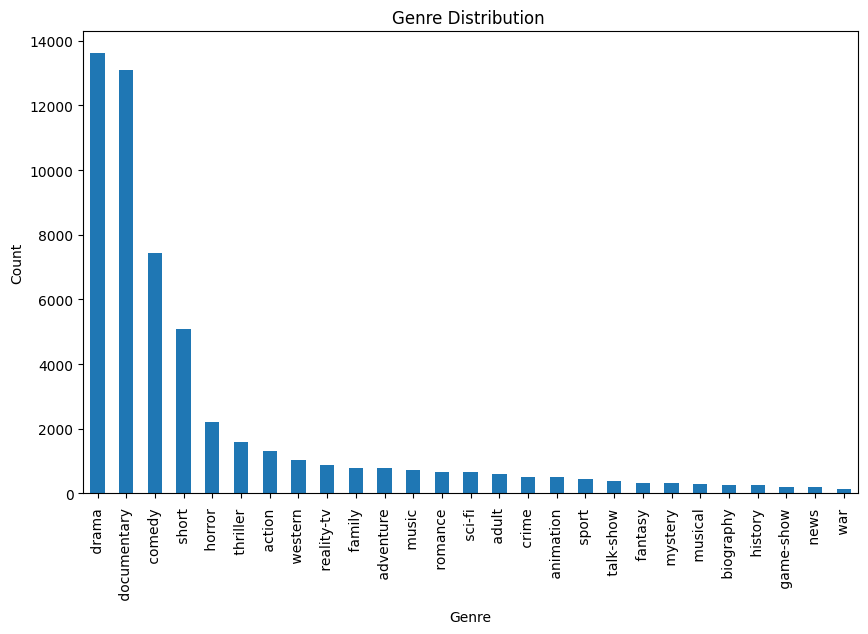

In [2]:
train_file_path = './Genre Classification Dataset/train_data.txt'  
test_file_path = './Genre Classification Dataset/test_data_solution.txt'  


train_df = pd.read_csv(train_file_path, sep=':::', header=None, engine='python')
train_df.columns = ['ID', 'Name', 'Genre', 'Description']
test_df = pd.read_csv(test_file_path, sep=':::', header=None, engine='python')
test_df.columns = ['ID', 'Name', 'Genre', 'Description']

train_df['Description'] = train_df['Description'].str.lower()
test_df['Description'] = test_df['Description'].str.lower()

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)

train_df['Description'] = train_df['Description'].apply(preprocess_text)
test_df['Description'] = test_df['Description'].apply(preprocess_text)

plt.figure(figsize=(10, 6))
train_df['Genre'].value_counts().plot(kind='bar')
plt.title('Genre Distribution ')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()


# TF-IDF Vectorization and Label Encoding

In [3]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(train_df['Description'])
X_test_tfidf = tfidf_vectorizer.transform(test_df['Description'])

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(train_df['Genre'])
y_test_encoded = label_encoder.transform(test_df['Genre'])

sample_doc_index = 0  
sample_doc_tfidf = X_tfidf[sample_doc_index].toarray().flatten()
feature_names = tfidf_vectorizer.get_feature_names_out()




# Split the Data

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)


# Train and Evaluate the Model

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


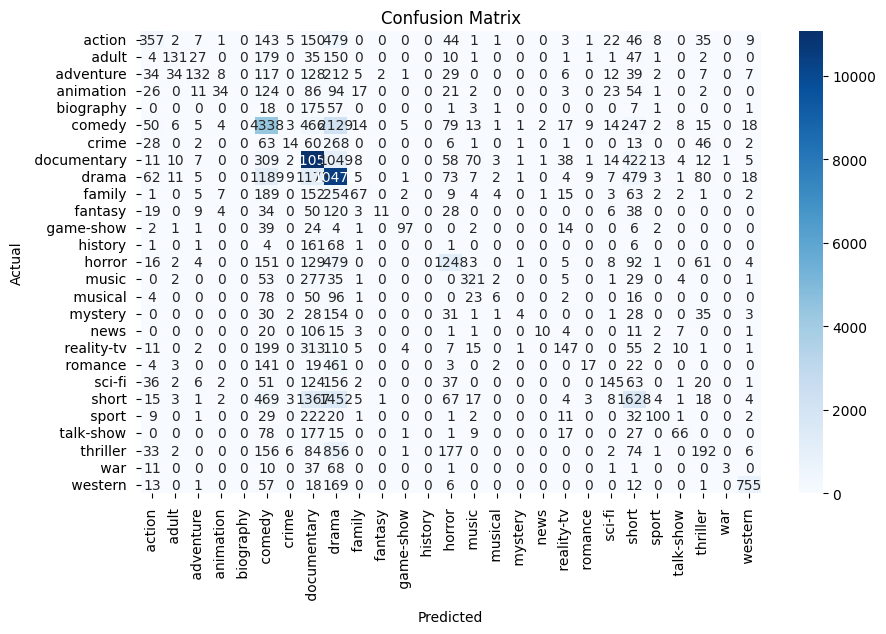


Accuracy : 0.5784317343173432
Classification Metrics :
                precision    recall  f1-score   support

      action        0.48      0.27      0.35      1314
       adult        0.63      0.22      0.33       590
   adventure        0.58      0.17      0.26       775
   animation        0.55      0.07      0.12       498
   biography        0.00      0.00      0.00       264
      comedy        0.52      0.58      0.55      7446
       crime        0.32      0.03      0.05       505
 documentary        0.66      0.84      0.74     13096
       drama        0.54      0.77      0.63     13612
      family        0.48      0.09      0.15       783
     fantasy        0.79      0.03      0.07       322
   game-show        0.87      0.50      0.64       193
     history        0.00      0.00      0.00       243
      horror        0.64      0.57      0.60      2204
       music        0.65      0.44      0.52       731
     musical        0.26      0.02      0.04       276
     my

In [5]:
model = LogisticRegression(max_iter=1000, C=1.0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test_encoded, y_pred)

classification_metrics = classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_)


conf_matrix = confusion_matrix(y_test_encoded, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nAccuracy :", accuracy)
print("Classification Metrics :\n", classification_metrics)